In [1]:
%matplotlib inline
import seaborn as sns
from birdsonganalysis.distribs import get_distribs
from birdsonganalysis import all_song_features
from birdsonganalysis import utils
from scipy.io import wavfile
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

from collections import defaultdict

In [2]:
sr, samba = wavfile.read('../songs/samba.wav')
sr, simple = wavfile.read('../songs/simple.wav')
sr, bells = wavfile.read('../songs/bells.wav')
sr, flashcam = wavfile.read('../songs/flashcam.wav')
sr, lg109 = wavfile.read('../songs/LG109.wav')
sr, lg193 = wavfile.read('../songs/LG193.wav')
sr, pu7 = wavfile.read('../songs/Pu7.wav')
sr, pu40 = wavfile.read('../songs/Pu40.wav')
sr, pu72 = wavfile.read('../songs/Pu72.wav')

songs = [samba, simple, bells, flashcam, lg109, lg193, pu7, pu40]

# Get the medians and the MAD

In [6]:
f = defaultdict(lambda: np.array([], dtype=float))
for song in songs:
    feats = all_song_features(song, sr, freq_range=256, fft_step=40, fft_size=1024)
    # remove the silence
    for key in feats:
        if (key != 'amplitude'):
            feats[key] = feats[key][feats['amplitude'] > np.percentile(feats['amplitude'], 20)]
    for fname in feats:
        f[fname] = np.concatenate((f[fname], feats[fname]))

In [7]:
def mad(arr):
    """ Median Absolute Deviation: a "Robust" version of standard deviation.
        Indices variabililty of the sample.
        https://en.wikipedia.org/wiki/Median_absolute_deviation 
    """
    arr = np.ma.array(arr).compressed() # should be faster to not use masked arrays.
    med = np.median(arr)
    return np.median(np.abs(arr - med))

In [11]:
from pprint import pformat
dmed = {}
dmad = {}
for key in f:
    cmed = np.median(f[key])
    cmad = mad(f[key])
    dmed[key] = cmed
    dmad[key] = cmad
print('med = {}'.format(pformat(dmed, indent=4)))
print()
print('mad = {}'.format(pformat(dmad, indent=4)))
utils.set_med_mad(dmed, dmad)

med = {   'am': 0.00039675611898210353,
    'amplitude': 82.958846230933801,
    'entropy': -3.4923664803371448,
    'fm': 0.84876612812883656,
    'goodness': 0.10728456589138036,
    'pitch': 3042.5634765625}

mad = {   'am': 3.1437898652827876,
    'amplitude': 6.4795818349700909,
    'entropy': 0.93547788888390127,
    'fm': 0.36812686183136534,
    'goodness': 0.026704864227088371,
    'pitch': 554.991455078125}


Let's put these values in utils.py

Let's compute all the global errors and locals errors possible between all of these songs against each other (therefore, 10×9/2=45 comparisons)

In [6]:
# Takes an hour or more, can be parallelised at some point
allG, allL = get_distribs(songs)

1/28
2/28
elapsed: 0:01:26.035748, Total: 0:40:09.000957
3/28
elapsed: 0:03:21.147661, Total: 0:46:56.067257
4/28
elapsed: 0:05:04.590624, Total: 0:47:22.845825
5/28
elapsed: 0:06:38.332192, Total: 0:46:28.325347
6/28
elapsed: 0:07:59.634694, Total: 0:44:45.954288
7/28
elapsed: 0:09:33.390314, Total: 0:44:35.821467
8/28
elapsed: 0:10:45.758354, Total: 0:43:03.033417
9/28
elapsed: 0:12:18.117683, Total: 0:43:03.411890
10/28
elapsed: 0:13:41.682468, Total: 0:42:36.345455
11/28
elapsed: 0:14:56.052822, Total: 0:41:48.947901
12/28
elapsed: 0:16:01.254775, Total: 0:40:46.830335
13/28
elapsed: 0:17:16.992791, Total: 0:40:19.649847
14/28
elapsed: 0:18:14.532255, Total: 0:39:17.454088
15/28
elapsed: 0:20:05.206621, Total: 0:40:10.413241
16/28
elapsed: 0:21:46.184306, Total: 0:40:38.210704
17/28
elapsed: 0:23:17.159887, Total: 0:40:45.029802
18/28
elapsed: 0:25:00.674334, Total: 0:41:11.698902
19/28
elapsed: 0:26:18.623040, Total: 0:40:55.635841
20/28
elapsed: 0:27:49.155048, Total: 0:40:59.807

# G² distribution
Let's plot allG

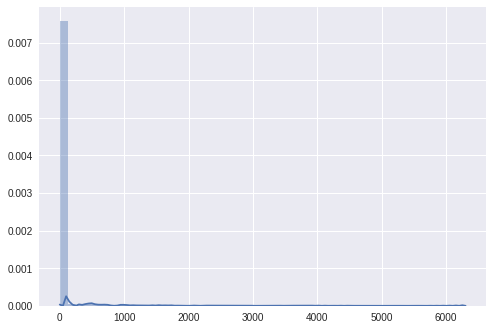

In [7]:
sns.distplot(allG)

Looks lognormal

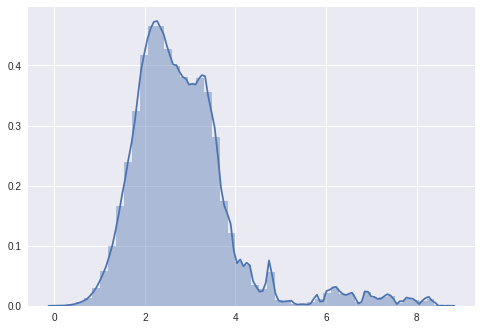

In [8]:
logallG = np.log(allG+0.01)
sns.distplot(logallG)  # Adds 0.01 to avoid -inf

In [9]:
np.mean(logallG)

2.8309372262945609

In [10]:
np.std(logallG, ddof=1)

1.1524324218450099

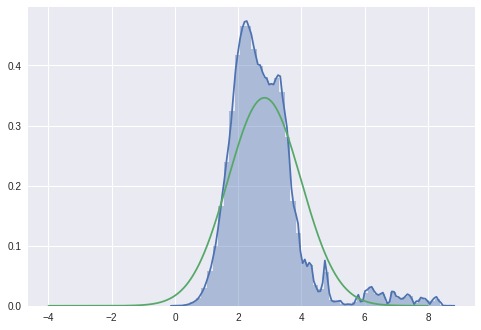

In [11]:
sns.distplot(logallG)  # Adds 0.01 to avoid -inf
plt.plot(np.linspace(-4, 8, 1000), norm.pdf(np.linspace(-4, 8, 1000), np.mean(logallG), np.std(logallG, ddof=1)))

The fit looks decent in log.

In [22]:
a = []
Gsorted = np.sort(allG)
for i in range(1, 101):
    a.append(np.percentile(Gsorted, i))
pprint(a, indent=4)

[   2.7893880973591956,
    3.2962860661126028,
    3.6763561978570047,
    3.9903175818085401,
    4.2647971429922515,
    4.511390597272193,
    4.7448091439854174,
    4.9668298676608709,
    5.1784511373759079,
    5.3865297586390692,
    5.5900396066874416,
    5.7895356873470076,
    5.9839121582465173,
    6.1718656123535371,
    6.355188436571777,
    6.5325771355187232,
    6.7075597346113218,
    6.8806072514128793,
    7.0528705915985537,
    7.2253815664580694,
    7.3994221676828484,
    7.5746783497994485,
    7.750008451799232,
    7.9259129026605786,
    8.103695818793252,
    8.2824368634698917,
    8.4640366157916525,
    8.6483413756151499,
    8.8351965111336792,
    9.024280345378779,
    9.2166563694487476,
    9.4123031946041635,
    9.612083602171003,
    9.8169694455270005,
    10.027745850777775,
    10.245546956989049,
    10.469980912767237,
    10.69868479822796,
    10.933743969041702,
    11.176611334407898,
    11.429308378097662,
    11.691003205680229,

# L² distribution
Let's plot allL

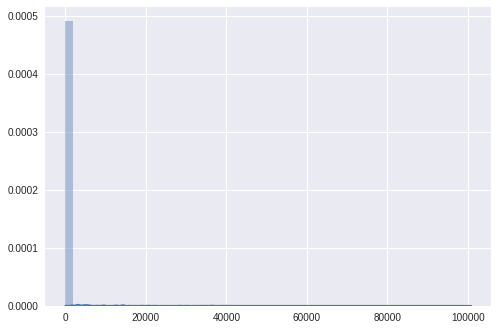

In [13]:
sns.distplot(allL)

Looks lognormal

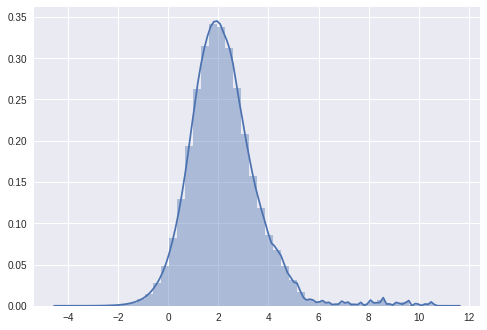

In [14]:
logallL = np.log(allL+0.01)
sns.distplot(logallL)  # Adds 0.01 to avoid -inf

In [15]:
np.mean(logallL)

2.2074295682492866

In [16]:
np.std(logallL, ddof=1)

1.4071071777980775

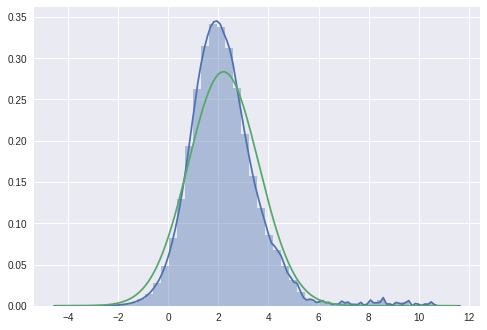

In [17]:
sns.distplot(logallL)  # Adds 0.001 to avoid -inf
imin, imax = np.min(logallL), np.max(logallL)
plt.plot(np.linspace(imin, imax, 1000), norm.pdf(np.linspace(imin, imax, 1000), np.mean(logallL), np.std(logallL, ddof=1)))

The fit looks decent in log.
We will use this value in similarity.py

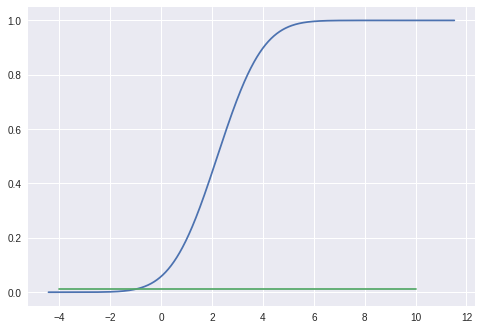

In [18]:
plt.plot(np.linspace(imin, imax, 1000), norm.cdf(np.linspace(imin, imax, 1000), np.mean(logallL), np.std(logallL, ddof=1)))
plt.plot([-4, 10], [0.01, 0.01])

In [21]:
b = []
Lsorted = np.sort(allL)
for i in range(1, 101):
    b.append( np.percentile(Lsorted, i))
pprint(b, indent=4)

[   0.54599694348614791,
    0.77518777088616497,
    0.96136423585440645,
    1.1249268277434958,
    1.2752329009248495,
    1.4167332298057389,
    1.5526729522929845,
    1.6837473735354551,
    1.8110095687311403,
    1.9355849483541776,
    2.0583184987682337,
    2.1791146864612934,
    2.2989471625151658,
    2.4172227039628988,
    2.5351401729993635,
    2.6530292721305426,
    2.7708409109493113,
    2.8892357679493803,
    3.0083625321061414,
    3.1279600016283409,
    3.2483759298059929,
    3.3699565156724272,
    3.4921266180322332,
    3.6167780243852077,
    3.7428257095914272,
    3.8714195260439541,
    4.0018568622075152,
    4.1347538265165245,
    4.2698515531310255,
    4.4073151932231163,
    4.5477757588434793,
    4.6916839853347518,
    4.8381860075590497,
    4.98711459148634,
    5.1394086225374362,
    5.2954320328914273,
    5.4547996706551807,
    5.6179430398258798,
    5.7854261046540572,
    5.9572590855752168,
    6.1338377483850959,
    6.314627149